## Assignment - Extra Credit 1
### Author: Shanshan Lin

This assignment takes the data set, 'time_series_covid19_confirmed_global.csv', from the CSSEGISandData COVID-19 data source that is accessible on GitHub (URL: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). The focus of this script is to perform explanatory analysis on this dataset. Specifically, the following steps will be taken for the analysis:

    1. Convert the dataset to a time series
    2. Perform data cleaning tasks, which can include but not limited to subsetting, reformatting, normalizing and imputing data abnormalities.
    3. Visualizing data using various types of plots to explore the relationship between variables.
    
The goal of the summary section at the end of this script is to:

    1. explain the purpose and structure of this dataset, and what has been done in this script to understand the data   
    2. highlight some significant relationships between variables in the data that are potential use cases for further analysis

### Preparation
Reading in the libraries and the input dataset:

In [63]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# read in data
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')

# Using the describe function to get a quick overview of this dataset
confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
count,278.000000,278.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02
mean,20.156042,21.788955,1.989286,2.339286,3.360714,5.121429,7.564286,10.453571,19.921429,22.025000,...,1.211138e+06,1.224212e+06,1.237926e+06,1.247512e+06,1.256100e+06,1.268536e+06,1.281806e+06,1.295234e+06,1.308184e+06,1.321271e+06
std,25.283318,76.200169,26.590143,26.687678,33.225879,46.244243,64.627991,87.077220,213.666694,214.980193,...,5.214809e+06,5.268299e+06,5.326903e+06,5.358841e+06,5.391538e+06,5.447711e+06,5.494231e+06,5.544259e+06,5.584359e+06,5.633429e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.643279,-37.713675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.101000e+03,7.196000e+03,7.265000e+03,7.265000e+03,7.265000e+03,7.280500e+03,7.423750e+03,7.583000e+03,7.588000e+03,7.595000e+03
50%,21.517170,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.261400e+04,6.275700e+04,6.312100e+04,6.326350e+04,6.340000e+04,6.398450e+04,6.418100e+04,6.445550e+04,6.506300e+04,6.582650e+04
75%,40.393350,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.559115e+05,5.701288e+05,5.835312e+05,5.923555e+05,6.022498e+05,6.050765e+05,6.117870e+05,6.231132e+05,6.331460e+05,6.452415e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.870722e+07,6.941776e+07,7.023992e+07,7.052604e+07,7.088171e+07,7.178348e+07,7.233344e+07,7.298065e+07,7.342426e+07,7.406711e+07


### Data Cleaning
1. First, converting the data into a time series

In [66]:
# Melt the dataframe so that all dates are in one column
df = pd.melt(confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'Date', value_name = 'Confirmed')

# setting the dates as index
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Converting to time series
df.set_index('Date', inplace=True)
df

,Province/State,Country/Region,Lat,Long,Confirmed
Date,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,0
2020-01-22,NaN,Albania,41.153300,20.168300,0
2020-01-22,NaN,Algeria,28.033900,1.659600,0
2020-01-22,NaN,Andorra,42.506300,1.521800,0
2020-01-22,NaN,Angola,-11.202700,17.873900,0
...,...,...,...,...,...
2022-01-28,NaN,Vietnam,14.058324,108.277199,2218137
2022-01-28,NaN,West Bank and Gaza,31.952200,35.233200,504992
2022-01-28,NaN,Yemen,15.552727,48.516388,10942


2. Subsetting data

Per definition, 'Lat' and 'Long' is 'Latitude' and 'Longitude', which are indicators of geographic locations on earth. This Analysis is primary interested in the relationship between Countries, Regions and the confirmed COVID-19 cases, and thus does not require the specific geographic coordinators of the regions. Therefore dropping these two columns from the data.

In [67]:
# Dropping column variables by name
df = df.drop(['Lat', 'Long'], axis = 1)
df

,Province/State,Country/Region,Confirmed
Date,,,
2020-01-22,NaN,Afghanistan,0
2020-01-22,NaN,Albania,0
2020-01-22,NaN,Algeria,0
2020-01-22,NaN,Andorra,0
2020-01-22,NaN,Angola,0
...,...,...,...
2022-01-28,NaN,Vietnam,2218137
2022-01-28,NaN,West Bank and Gaza,504992
2022-01-28,NaN,Yemen,10942


Confirming that there are no missing values in the numerical column:

In [69]:
# returns the rows that have missing value in 'Confirmed' column, if any
df[df['Confirmed'].isnull()]

,Province/State,Country/Region,Confirmed
Date,,,


### Visualizations
1. Plotting a line chart for the confirmed variable

<AxesSubplot:xlabel='Country/Region'>

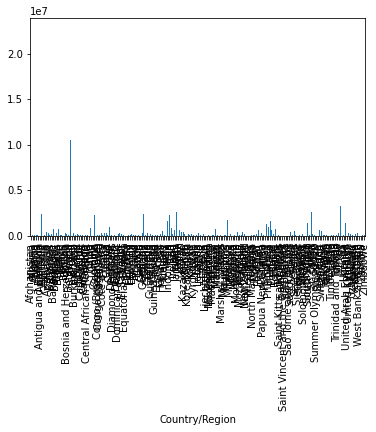

In [61]:
df.groupby('Country/Region').mean().Confirmed.plot(kind = 'bar')

In [68]:
df.describe()

,Confirmed
count,2.066400e+05
mean,4.059282e+05
std,2.423335e+06
min,0.000000e+00
25%,2.060000e+02
50%,4.237000e+03
75%,8.432975e+04
max,7.406711e+07
